Because it seems that the countries of origin will be difficult to separate, we will try looking at growing altitude or processing method. It is possible we may see clearer clustering with these variables of interest.

In [9]:
import pandas as pd
import numpy as np

In [10]:
coffee_df = pd.read_csv("../data/coffee_full.csv")
coffee_df.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,1950.0,2200.0,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0
2,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,1600.0,1800.0,1700.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,1800.0,2200.0,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0


We see that this data set now contains the altitude measures and the processing methods. However, some null values remain, so we will remove those. 

In [11]:
coffee = coffee_df.dropna(axis = 0)
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country_of_Origin     1005 non-null   object 
 1   Processing_Method     1005 non-null   object 
 2   Aroma                 1005 non-null   float64
 3   Flavor                1005 non-null   float64
 4   Aftertaste            1005 non-null   float64
 5   Acidity               1005 non-null   float64
 6   Body                  1005 non-null   float64
 7   Balance               1005 non-null   float64
 8   Uniformity            1005 non-null   float64
 9   Clean_Cup             1005 non-null   float64
 10  Sweetness             1005 non-null   float64
 11  Cupper_Points         1005 non-null   float64
 12  altitude_low_meters   1005 non-null   float64
 13  altitude_high_meters  1005 non-null   float64
 14  altitude_mean_meters  1005 non-null   float64
dtypes: float64(13), objec

In [15]:
## We will also quickly remove any outliers with very large altitude values
## Otherwise the outliers will interfere with the scaling on our plots
coffee = coffee.drop(coffee[coffee.altitude_mean_meters > 5000].index)

In [16]:
## Now perform the train test split
from sklearn.model_selection import train_test_split

In [17]:
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            test_size = .2)

In [18]:
## import some additional packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

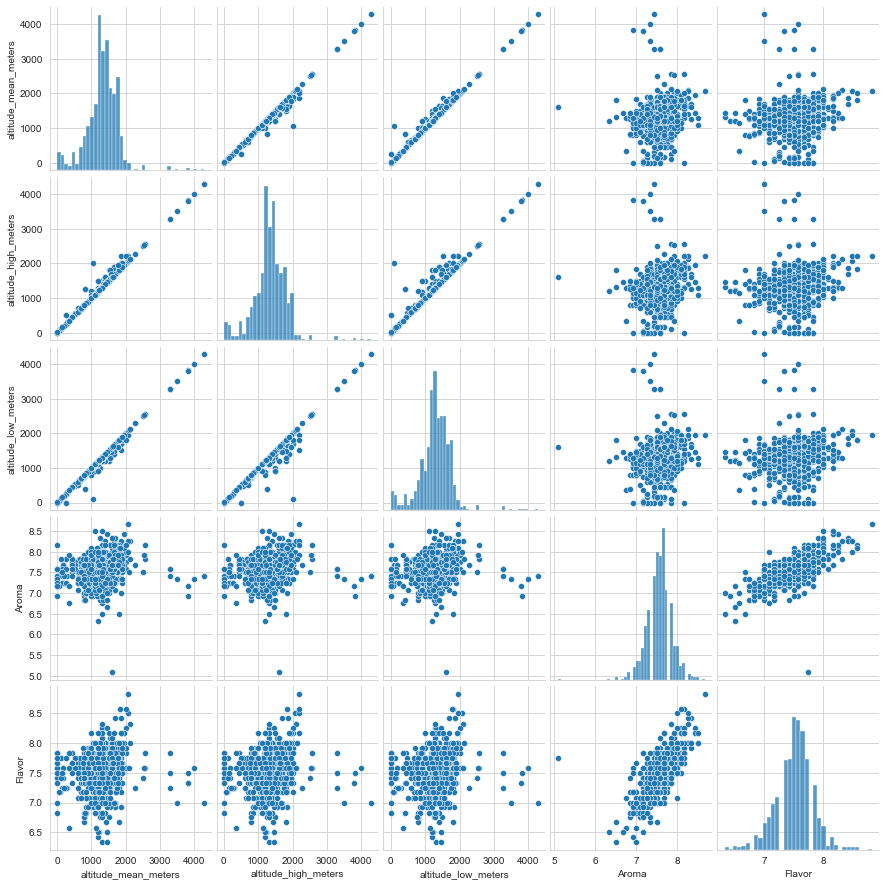

In [21]:
## Do the ratings have any obvious relationship to altitude?
sns.pairplot(coffee_train, vars = ["altitude_mean_meters", "altitude_high_meters", "altitude_low_meters", "Aroma", "Flavor"])

When looking at ratings such as aroma and flavor, there doesn't seem to be an immediate correlation between the rating and the altitude. It would likely be difficult to use these ratings to predict the altitude the coffee was grown at. Finally, we will see if the ratings seem to cluster based on the processing method.

In [23]:
## Check how many processing methods there are and what their labels are
coffee.Processing_Method.value_counts()

Washed / Wet                 735
Natural / Dry                179
Semi-washed / Semi-pulped     52
Other                         25
Pulped natural / honey        10
Name: Processing_Method, dtype: int64

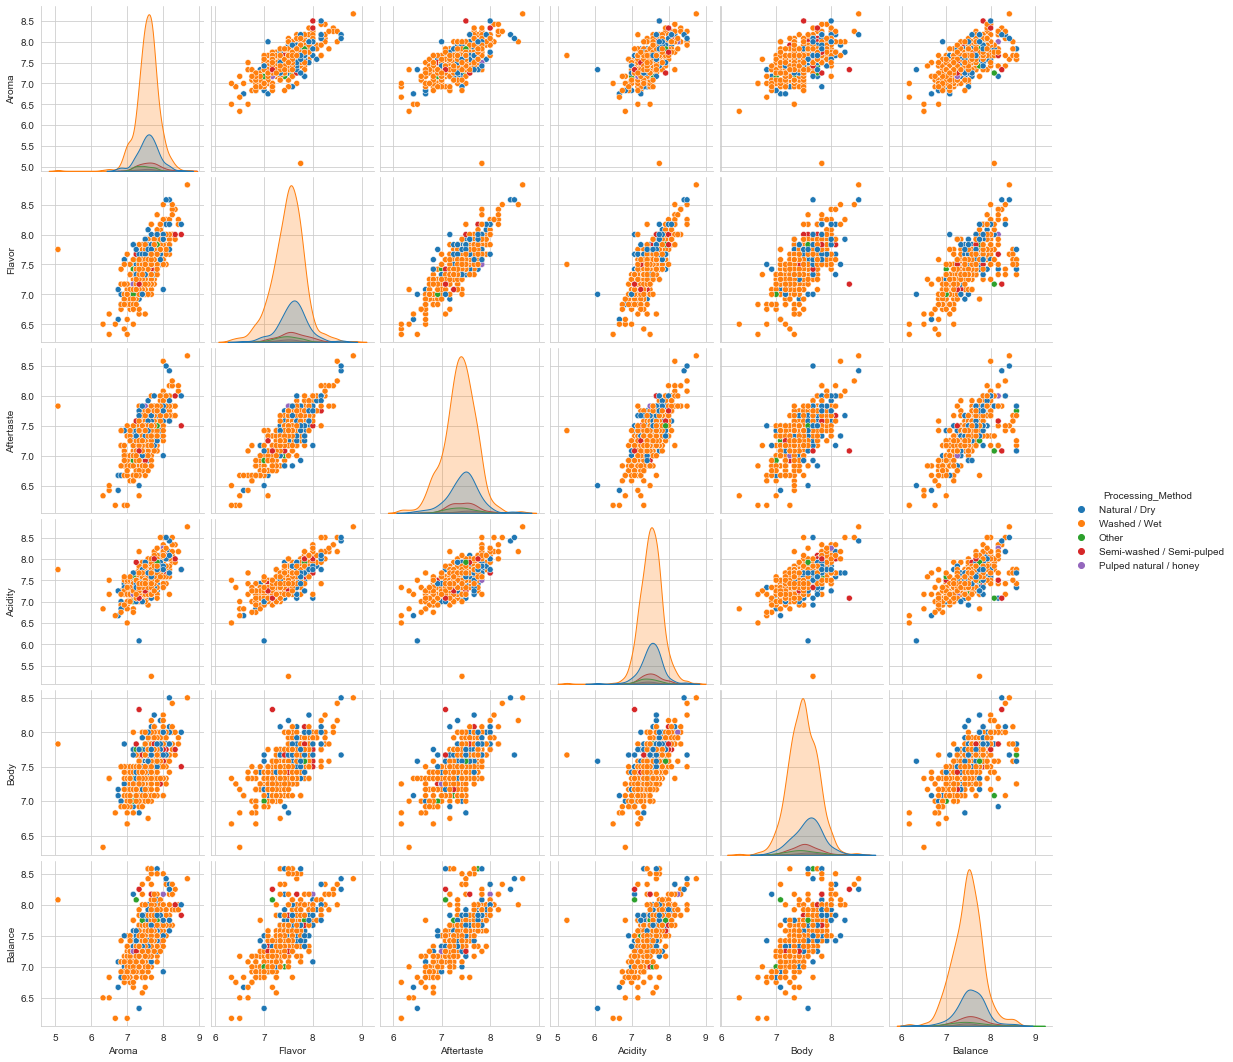

In [24]:
## Do the ratings have any obvious relationship to processing method?
sns.pairplot(coffee_train, vars = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"],  hue = "Processing_Method")

Again, there doesn't seem to be any clear difference in the ratings based on the processing method. Unfortunately, it seems we cannot use this data to predict which processing method was used.